# **Compte-rendu sur une particule dans un cyclotron**

Dans ce projet, on souhaite quantifier le mouvement d'une particule dans un cyclotron. Pour cela, on déterminera les composantes $v_x$ et $v_y$ de la vitesse de la particule selon les parties du cyclotron (dans les deux boucles en "D" et entre ces boucles), puis on étudiera la vitesse de la particule et ses particularités. Le but de ce projet est de comprendre le fonctionnement du cyclotron, son rôle, et de quantifier son action sur une particule (ici un proton).

Avant toute chose, on importe les librairies Python nécessaires.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Partie 1

Dans un premier temps, pour pouvoir calculer la vitesse de la particule (en particuler ses composantes $v_x$ et $v_y$), il faut déterminer les instants auxquels la particule entre et sort des D. Ces instants remarquables sont donnés par la formule $t_n=n+\tau \sqrt{n}$ (qui correspondent aux instants de sortie des D).

On calcule ces instants pour $n$ variant de $0$ à $50$.

In [62]:
# Calcul des instants
ind = np.arange(0,51,1)
tau = 0.5
temps = ind + tau * np.sqrt(ind)

On vérifie nos valeurs, en les comparant aux valeurs données par l'énoncé : $t_1=1.5$, $t_4=5$, $t_9=10.5$, $t_{16}=18$, et $t_{25}=27.5$.

In [14]:
print(f"La valeur de t1 est 1.5 : {temps[1] == 1.5}.")
print(f"La valeur de t4 est 5 : {temps[4] == 5}.")
print(f"La valeur de t9 est 10.5 : {temps[9] == 10.5}.")
print(f"La valeur de t16 est 18 : {temps[16] == 18}.")
print(f"La valeur de t25 est 27.5 : {temps[25] == 27.5}.")

La valeur de t1 est 1.5 : True.
La valeur de t4 est 5 : True.
La valeur de t9 est 10.5 : True.
La valeur de t16 est 18 : True.
La valeur de t25 est 27.5 : True.


Les valeurs calculées correspondent donc bien à celles données par l'énoncé.

Une fois la liste des temps établie, on peut calculer les vitesses selon $x$ et $y$ quand la particule se trouve dans les D, données par les formules $v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right)$ et $ v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)$, avec $\epsilon_n = (-1)^n$. On étudiera un échantillon de temps entre $t_{n+1}-1$ et $t_{n+1}$.

In [32]:
# On définit la fonction qui calcule les composantes vx et vy de v
def v_D(n):
    t_list = np.linspace(temps[n+1]-1,temps[n+1],100)
    epsilon = (-1)**n
    vx = epsilon * np.sqrt(n+1) * np.sin(np.pi*(t_list - temps[n+1]))
    vy = -epsilon * np.sqrt(n+1) * np.cos(np.pi*(t_list - temps[n+1]))
    return t_list, vx, vy

On peut alors calculer les vitesses $v_x$ et $v_y$ pour les intervalles $[t_2−1,t_2]$ et $[t_4−1,t_4]$, et les tracer en fonction du temps.

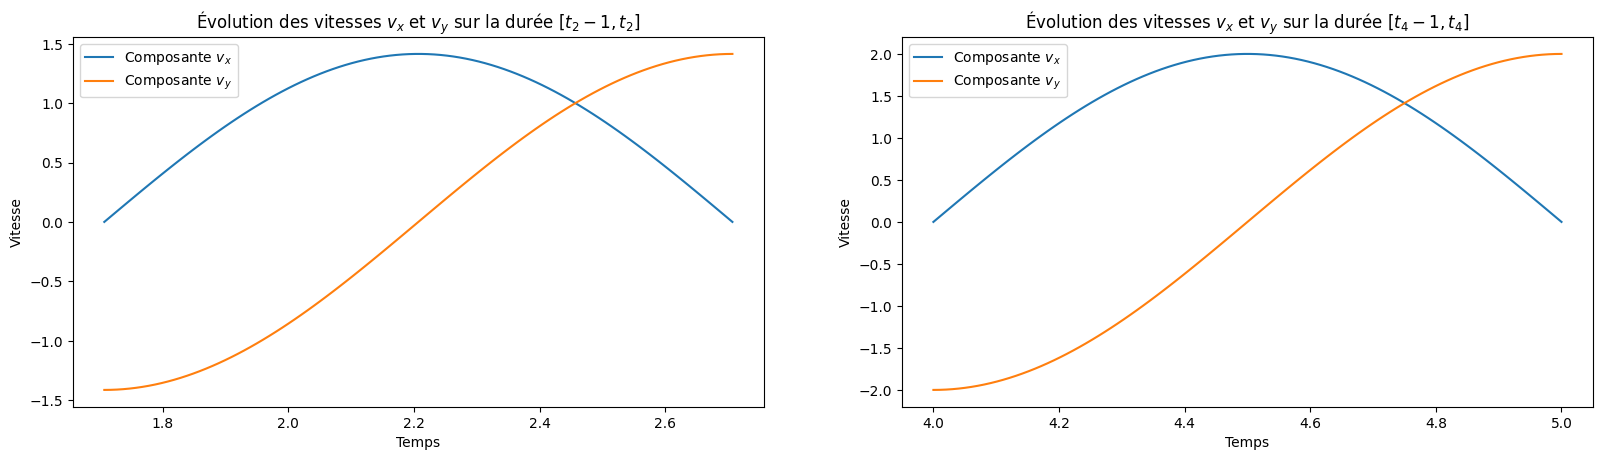

In [56]:
# On calcule les vitesses vx et vy (sachant que 2 = n + 1 dans le premier cas et 4 = n + 1 dans le deuxième)
v2_D = v_D(1)
v4_D = v_D(3)

# Tracé des vitesses pour n + 1 = 2
plt.subplot(1,2,1)
plt.plot(v2_D[0], v2_D[1], label="Composante $v_x$")
plt.plot(v2_D[0], v2_D[2], label="Composante $v_y$")
plt.xlabel("Temps")
plt.ylabel("Vitesse")
plt.legend()
plt.title("Évolution des vitesses $v_x$ et $v_y$ sur la durée $[t_2−1,t_2]$")

# Tracé des vitesses pour n + 1 = 4
plt.subplot(1,2,2)
plt.plot(v4_D[0], v4_D[1], label="Composante $v_x$")
plt.plot(v4_D[0], v4_D[2], label="Composante $v_y$")
plt.xlabel("Temps")
plt.ylabel("Vitesse")
plt.legend()
plt.title("Évolution des vitesses $v_x$ et $v_y$ sur la durée $[t_4−1,t_4]$")

plt.subplots_adjust(right=2.5)
plt.show()

À partir de ces graphes, on souhaite à présent déterminer les maximas respectifs des composantes $v_x$ et $v_y$ de la vitesse dans les deux intervalles considérés.

In [60]:
# Fonction qui calcule v_max et l'instant associé
def v_max(v_tab,i):
    ind_max = np.argmax(v_tab[i])
    t_max = v_tab[0][ind_max]
    return t_max,v_tab[i].max()

print(f"Entre t2-1 et t2, on a vx_max = {v_max(v2_D,1)[1]:.1f} en t = {v_max(v2_D,1)[0]:.1f}, et vy_max = {v_max(v2_D,2)[1]:.1f} en t = {v_max(v2_D,2)[0]:.1f}.")
print(f"Entre t4-1 et t4, on a vx_max = {v_max(v4_D,1)[1]:.1f} en t = {v_max(v4_D,1)[0]:.1f}, et vy_max = {v_max(v4_D,2)[1]:.1f} en t = {v_max(v4_D,2)[0]:.1f}.")

Entre t2-1 et t2, on a vx_max = 1.4 en t = 2.2, et vy_max = 1.4 en t = 2.7.
Entre t4-1 et t4, on a vx_max = 2.0 en t = 4.5, et vy_max = 2.0 en t = 5.0.


On remarque que $v_x$ est maximal au milieu de l'intervalle considéré (que ce soit $[t_2−1,t_2]$ ou $[t_4−1,t_4]$), et que $v_y$ est maximal en $t_{n+1}$ (ici $t_2$ et $t_4$ respectivement). De plus, on a $v_{x,max}=v_{y,max}$ dans chaque intervalle. En particulier, d'après le graphique lorsque $v_x$ est maximal, $v_y=0$ et inversement.

## Partie 2

On veut à présent pouvoir représenter l'évolution des vitesses $v_x$ et $v_y$ sur l'intervalle $[0,t_6]$. Pour cela, définissions $v_x$ et $v_y$ lorsque la particule se trouve entre les deux D. Leurs formules sont données par $v_x(t) = 0 $ et $v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)$ pour $t$ variant de $t_n$ à $t_{n+1}-1$.

In [92]:
# On définit la fonction qui calcule les composantes vx et vy de v
def v_nD(n):
    t_list = np.linspace(temps[n],temps[n+1]-1,100)
    epsilon = (-1)**n
    vx = 0 * t_list
    vy = epsilon*(np.sqrt(n) + (t_list - temps[n])/tau)
    return t_list, vx, vy

On peut à présent décomposer les calculs de vitesse sur l'intervalle $[0,t_6]$ grâce aux fonctions `v_D(n)` et `v_nD(n)`.

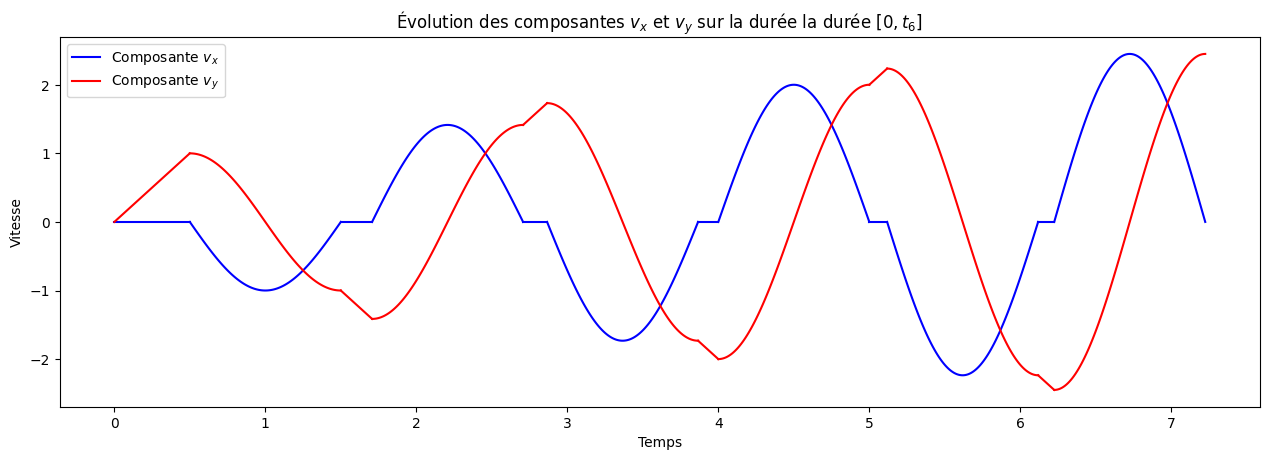

In [119]:
# Tracé de vx et vy
for i in range(0,6):
    v = v_nD(i)
    plt.plot(v[0], v[1], color = "blue")
    plt.plot(v[0], v[2], color = "red")
    v2 = v_D(i)
    plt.plot(v2[0], v2[1], color = "blue")
    plt.plot(v2[0], v2[2], color = "red")
    
# Faire apparaître les labels des courbes
plt.plot(0,0,label="Composante $v_x$", color="blue")
plt.plot(0,0,label="Composante $v_y$", color="red")

plt.xlabel("Temps")
plt.ylabel("Vitesse")
plt.title("Évolution des composantes $v_x$ et $v_y$ sur la durée la durée $[0,t_6]$")
plt.subplots_adjust(right=2)
plt.legend()
plt.show()

Le graphe montre bien un comportement sinusoïdal lorsque la particule est dans un des D, tandis l'évolution de $v_x$ et $v_y$ est linéaire entre les D. On remarque aussi que les deux évolutions sont continues. En effet, il ne serait pas possible physiquement que la particule change de vitesse instantanément (ou alors ce changement devrait être très rapide).

On peut alors tracer l'évolution de la vitesse au cours du temps, définie comme $\sqrt{v_x^2+v_y^2}$.

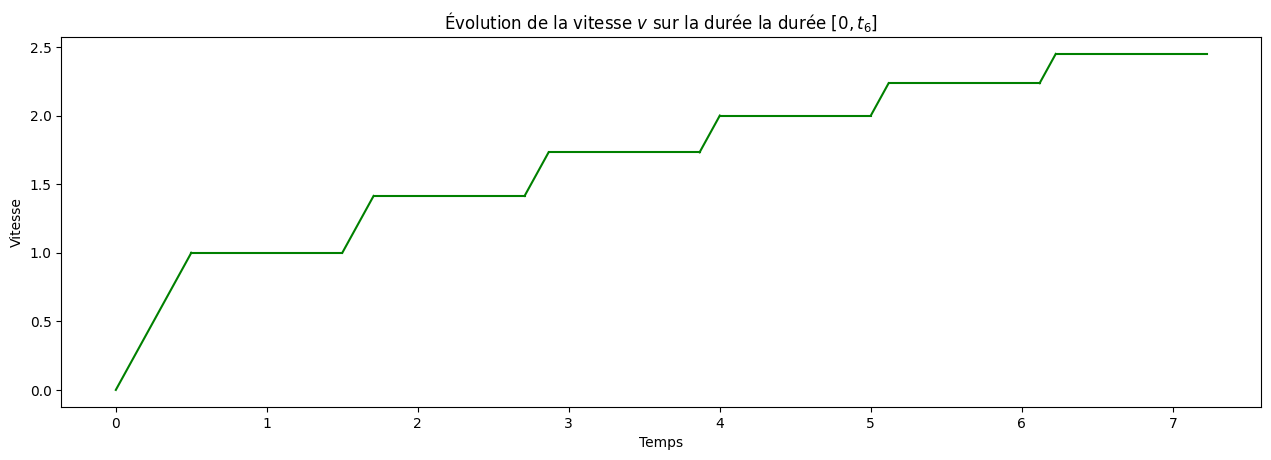

In [120]:
# Tracé de la vitesse v
for i in range(0,6):
    v = v_nD(i)
    vitesse = np.sqrt((v[1])**2+(v[2])**2)
    plt.plot(v[0], vitesse, color = "green")
    v2 = v_D(i)
    vitesse2 = np.sqrt((v2[1])**2+(v2[2])**2)
    plt.plot(v2[0], vitesse2, color = "green")

# Faire apparaître le label de la courbe    
plt.plot(0,0,label="Vitesse $v$", color="red")
    
plt.xlabel("Temps")
plt.ylabel("Vitesse")
plt.title("Évolution de la vitesse $v$ sur la durée la durée $[0,t_6]$")
plt.subplots_adjust(right=2)
plt.show()

On remarque donc une évolution de la vitesse de la particule par paliers. En comparant ce graphe avec le précédent, on identifie que, sur les intervalles du type $[t_{n+1}-1,t_{n+1}]$, la vitesse est constante (car les évolutions sinusoïdales des $v_x$ et des $v_y$ se compensent), et sur les intervalles du type $[t_n,t_{n+1}-1]$, c'est-à-dire lorsque la particule se trouve entre les deux D, celle-ci se trouve accélérée. **Le cyclotron permet donc d'accélérer les particules.**

Enfin, on peut étudier l'évolution de la vitesse (par exemple sur l'intervalle $[0,t_{50}]$) par rapport au temps total passé par la particule entre les deux D à l'instant $t_n$ (c'est-à-dire par rapport à $t_n-n$). Pour cela, on ne tracera que les intervalles où la vitesse varie, c'est-à-dire entre les deux D.

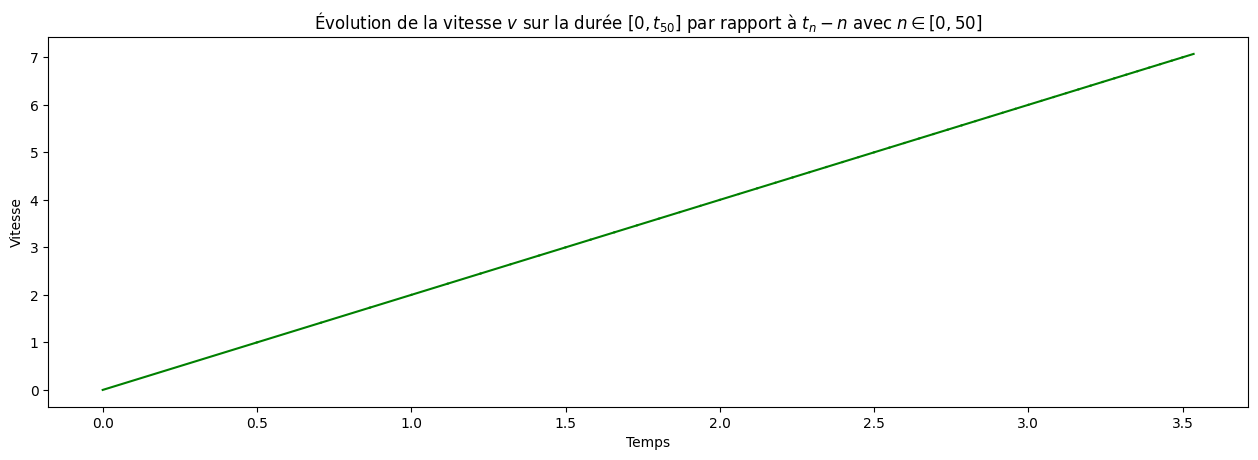

In [116]:
# Tracé de la vitesse v entre les deux D
for i in range(0,50):
    v = v_nD(i)
    vitesse = np.sqrt((v[1])**2+(v[2])**2)
    plt.plot(v[0]-i, vitesse, color = "green")
    
plt.xlabel("Temps")
plt.ylabel("Vitesse")
plt.title("Évolution de la vitesse $v$ sur la durée $[0,t_{50}]$ par rapport à $t_n-n$ avec $n\in[0,50]$")
plt.subplots_adjust(right=2)
plt.show()

On remarque que l'évolution de la vitesse par rapport au temps total passé entre les deux D à l'instant $t_n$ est linéaire. Cela signifie que plus le temps passé entre les deux D serait grand, plus sa vitesse le sera aussi. Comme la particule n'est accélérée que lorsqu'elle se trouve entre les deux D, il est logique que, plus elle y passe du temps, plus sa vitesse sera élevée à l'entrée du prochain D.